Codes for making Figure 3f-g in the manuscript.

In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(gprofiler2))
suppressMessages(library(pheatmap))
suppressMessages(library(ggplot2))
suppressMessages(library(RColorBrewer))
source('trio_analysis_helper.R')

In [2]:
output_dir <- '../../analysis/real_data/output'
fig_dir <- '../../analysis/manuscript/figures'

In [3]:
trio_pval_cutoff_vec <- c(0.001, 0.001, 0.05, 0.05, 0.1)
names(trio_pval_cutoff_vec) <- c('Excitatory', 'Inhibitory', 'Oligodendrocytes', 'Astrocytes', 'Microglia')

study <- 'brain_CG'

# Main figures

## Excitatory neurons

In [4]:
ct <- 'Excitatory'
Exc_enr <- list()
fn <- sprintf('%s/brain_CG/%s_trio_p_2000.rds', output_dir, ct)
if(!file.exists(fn)){
    trios_list <- load_trios_list(2000, ct, study, trio_pval_cutoff_vec[ct], output_dir)
    Exc_enr[['p=2000']] <- summarize_enr(trios_list, p_top = 10)
    saveRDS(Exc_enr[['p=2000']], fn)
}else{
    Exc_enr[['p=2000']] <- readRDS(fn)
}

enrich_matrix <- make_pheatmap(Exc_enr[['p=2000']])
selected_inds <- c(11,12,20,21,24,26,30,31,38,40,44,53,54,58,64,65,67)

term_ct_label <- data.frame(ct_function = rep(F, nrow(enrich_matrix)))
rownames(term_ct_label) <- rownames(enrich_matrix)
term_ct_label$ct_function[selected_inds] <- T
term_ct_label$ct_function <- factor(term_ct_label$ct_function)

In [5]:
sig_inds <- which(apply(enrich_matrix,1,max) > -log10(0.01))
sum_enr <- enrich_matrix[intersect(selected_inds, sig_inds),]
rownames(sum_enr)[which(nchar(rownames(sum_enr)) > 50)]

character(0)

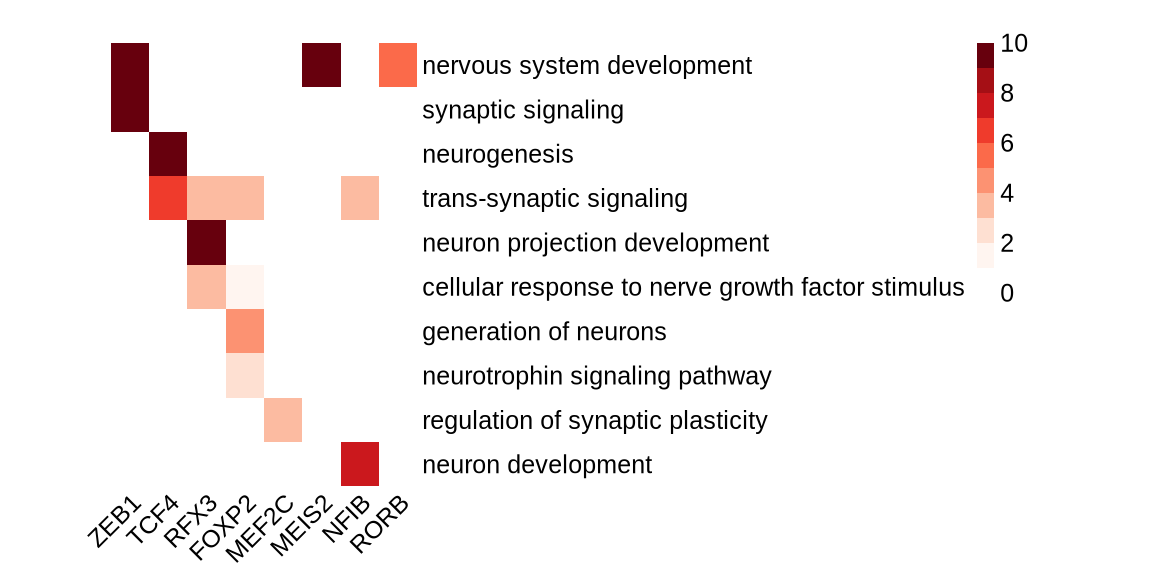

In [6]:

#rownames(sum_enr)[rownames(sum_enr) == 'neurotransmitter receptor localization to postsynaptic specialization membrane'] <-
#'neurotransmitter receptor localization to \n postsynaptic specialization membrane'
#rownames(sum_enr)[rownames(sum_enr) == 'principal sensory nucleus of trigeminal nerve development'] <-
#'principal sensory nucleus of trigeminal \n nerve development'

# filter by adjusted p value < 0.05
int_enr_sum <- sum_enr[apply(sum_enr,1,max) > -log10(0.05),] 
# filter TFs with no relevant enrichment
int_enr_sum <- int_enr_sum[,colSums(int_enr_sum) > 0]

# cap at 10
int_enr_sum[int_enr_sum > 10] <- 10

# if we want to explore putting GO term names on the left
# https://stackoverflow.com/questions/57729914/how-can-you-show-the-rownames-in-pheatmap-on-the-left-side-of-the-graph
repr.plot.ratio <- 1.6
options(repr.plot.width = 6 * repr.plot.ratio, repr.plot.height= 3 * repr.plot.ratio)

g <- pheatmap(int_enr_sum,
              col = c('white', brewer.pal(9, 'Reds')),
              cluster_rows = F, cluster_cols = F,
              annotation_names_row = F,
              annotation_names_col = F,
              fontsize_row = 15,          # row label font size
              fontsize_col = 15,          # column label font size 
              angle_col = 45, # sample names at an angle
              show_colnames = T, show_rownames = T, # displaying column and row names
              main = '',
              fontsize = 15,
              border_color  = NA, cellwidth=23)
ggsave(sprintf('%s/trio/%s_2000.pdf', fig_dir, ct), g, width = 6 * repr.plot.ratio, height = 3 * repr.plot.ratio)

## Astrocytes

In [7]:
Ast_enr <- list()
ct <- 'Astrocytes'
fn <- sprintf('%s/brain_CG/%s_trio_p_2000.rds', output_dir, ct)
if(!file.exists(fn)){
    trios_list <- load_trios_list(2000, ct, study, trio_pval_cutoff_vec[ct], output_dir)
    Ast_enr[['p=2000']] <- summarize_enr(trios_list, p_top = 10)
    saveRDS(Ast_enr[['p=2000']], fn)
}else{
    Ast_enr[['p=2000']] <- readRDS(fn)
}

In [8]:
enrich_matrix <- make_pheatmap(Ast_enr[['p=2000']])
selected_inds <- c(11,12,14,
               15,#17, # mesenchymal cell & BBB: https://link.springer.com/article/10.1186/s13287-015-0180-4
               18, # ERBB & astrocyte:  https://www.nature.com/articles/celldisc201744
               20,28,29,32,35,37,39,46)
sum_enr <- enrich_matrix[selected_inds,]

# filter by adjusted p value < 0.05
int_enr_sum <- sum_enr[apply(sum_enr,1,max) > -log10(0.05),] 
# filter TFs with no relevant enrichment
int_enr_sum <- int_enr_sum[,colSums(int_enr_sum) > 0]

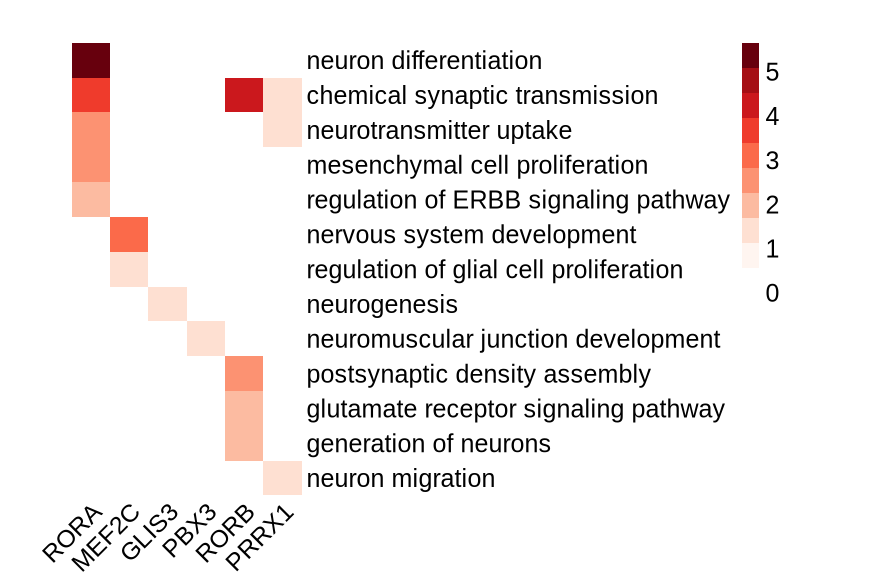

In [9]:
# if we want to explore putting GO term names on the left
# https://stackoverflow.com/questions/57729914/how-can-you-show-the-rownames-in-pheatmap-on-the-left-side-of-the-graph
repr.plot.ratio <- 1.22
options(repr.plot.width = 6 * repr.plot.ratio, repr.plot.height=4 * repr.plot.ratio)

g <- pheatmap(int_enr_sum,
              col = c('white', brewer.pal(9, 'Reds')),
              cluster_rows = F, cluster_cols = F,
              annotation_names_row = F,
              annotation_names_col = F,
              fontsize_row = 15,          # row label font size
              fontsize_col = 15,          # column label font size 
              angle_col = 45, # sample names at an angle
              show_colnames = T, show_rownames = T, # displaying column and row names
              main = '',
              fontsize = 15,
              border_color  = NA, cellwidth=23)
ggsave(sprintf('%s/trio/%s_2000.pdf', fig_dir, ct), g, width = 6 * repr.plot.ratio, height = 4 * repr.plot.ratio)

# Supplementary figures

## Microglia

In [10]:
Mic_enr <- list()
ct <- 'Microglia'
fn <- sprintf('%s/brain_CG/%s_trio_p_2000.rds', output_dir, ct)
if(!file.exists(fn)){
    trios_list <- load_trios_list(2000, ct, study, trio_pval_cutoff_vec[ct], output_dir)
    Mic_enr[['p=2000']] <- summarize_enr(trios_list, p_top = 10)
    saveRDS(Mic_enr[['p=2000']], fn)
}else{
    Mic_enr[['p=2000']] <- readRDS(fn)
}


In [11]:
enrich_matrix <- make_pheatmap(Mic_enr[['p=2000']])
# microglia & immune -related terms
selected_inds <- c(8, 12, 19,25,26,30,31,37,38,39,46,58)
rownames(enrich_matrix[selected_inds,])
nchar(rownames(enrich_matrix[selected_inds,]))
which(nchar(rownames(enrich_matrix[selected_inds,])) > 50)
sum_enr <- enrich_matrix[selected_inds,]
rownames(sum_enr)[9] <- 'negative regulation of inflammatory response \nto antigenic stimulus'

# filter by adjusted p value < 0.05
int_enr_sum <- sum_enr[apply(sum_enr,1,max) > -log10(0.05),] 
# filter TFs with no relevant enrichment
int_enr_sum <- int_enr_sum[,colSums(int_enr_sum) > 0]


[1] "leukocyte migration"                                               
 [2] "neuron differentiation"                                            
 [3] "regulation of response to stimulus"                                
 [4] "response to molecule of bacterial origin"                          
 [5] "leukocyte activation"                                              
 [6] "regulation of leukocyte apoptotic process"                         
 [7] "regulation of gliogenesis"                                         
 [8] "type II interferon-mediated signaling pathway"                     
 [9] "negative regulation of inflammatory response to antigenic stimulus"
[10] "negative regulation of ERBB signaling pathway"                     
[11] "positive regulation of interleukin-2 production"                   
[12] "positive regulation of defense response"

[1] 19 22 34 40 20 41 25 45 66 45 47 39

[1] 9

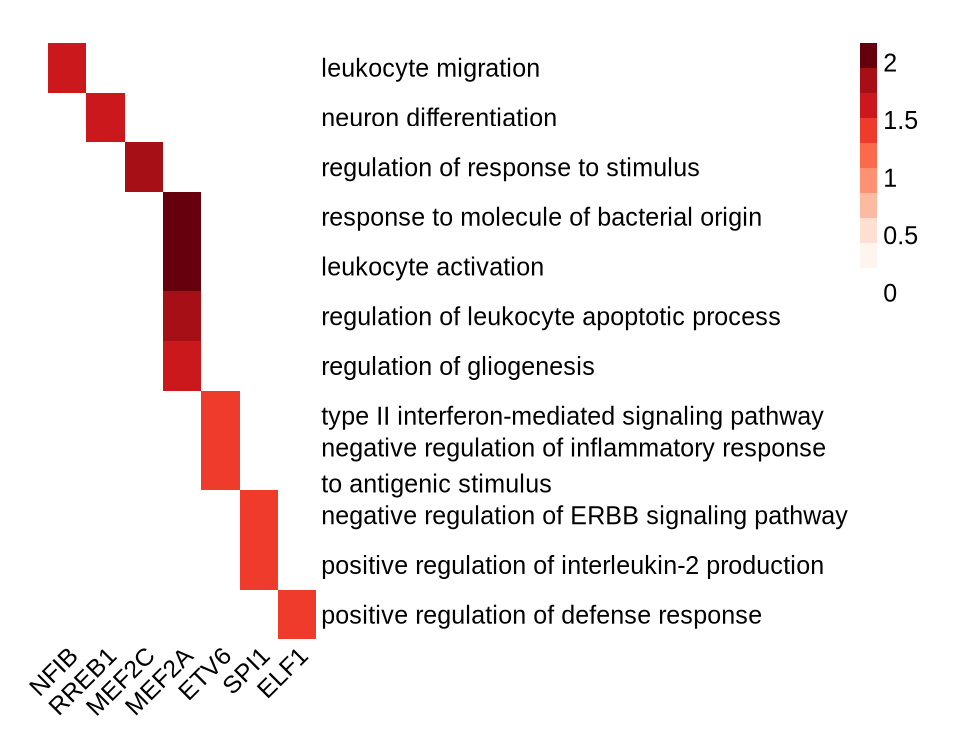

In [12]:

# if we want to explore putting GO term names on the left
# https://stackoverflow.com/questions/57729914/how-can-you-show-the-rownames-in-pheatmap-on-the-left-side-of-the-graph
repr.plot.ratio <- 1.35
options(repr.plot.width = 6 * repr.plot.ratio, repr.plot.height=4.5 * repr.plot.ratio)
g <- pheatmap(int_enr_sum,
              col = c('white', brewer.pal(9, 'Reds')),
              cluster_rows = F, cluster_cols = F,
              annotation_names_row = F,
              annotation_names_col = F,
              fontsize_row = 15,          # row label font size
              fontsize_col = 15,          # column label font size 
              angle_col = 45, # sample names at an angle
              show_colnames = T, show_rownames = T, # displaying column and row names
              main = '',
              fontsize = 15,
              border_color  = NA, cellwidth=23)
ggsave(sprintf('%s/trio/%s_2000.pdf', fig_dir, ct), g, width = 6 * repr.plot.ratio, height = 4 * repr.plot.ratio)

## Inhibitory neurons

In [13]:
Inh_enr <- list()
ct <- 'Inhibitory'
fn <- sprintf('%s/brain_CG/%s_trio_p_2000.rds', output_dir, ct)
if(!file.exists(fn)){
    trios_list <- load_trios_list(2000, ct, study, trio_pval_cutoff_vec[ct], output_dir)
    Inh_enr[['p=2000']] <- summarize_enr(trios_list, p_top = 10)
    saveRDS(Inh_enr[['p=2000']], fn)
}else{
    Inh_enr[['p=2000']] <- readRDS(fn)
}


In [14]:
enrich_matrix <- make_pheatmap(Inh_enr[['p=2000']])
selected_inds <- c(1,2,9,11,19,45,48,55,60,62,63,65)
sum_enr <- enrich_matrix[selected_inds,]
# filter by adjusted p value < 0.05
int_enr_sum <- sum_enr[apply(sum_enr,1,max) > -log10(0.05),] 
# filter TFs with no relevant enrichment
int_enr_sum <- int_enr_sum[,colSums(int_enr_sum) > 0]
#data.frame(rownames(enrich_matrix), 1:nrow(enrich_matrix))[1:30,]

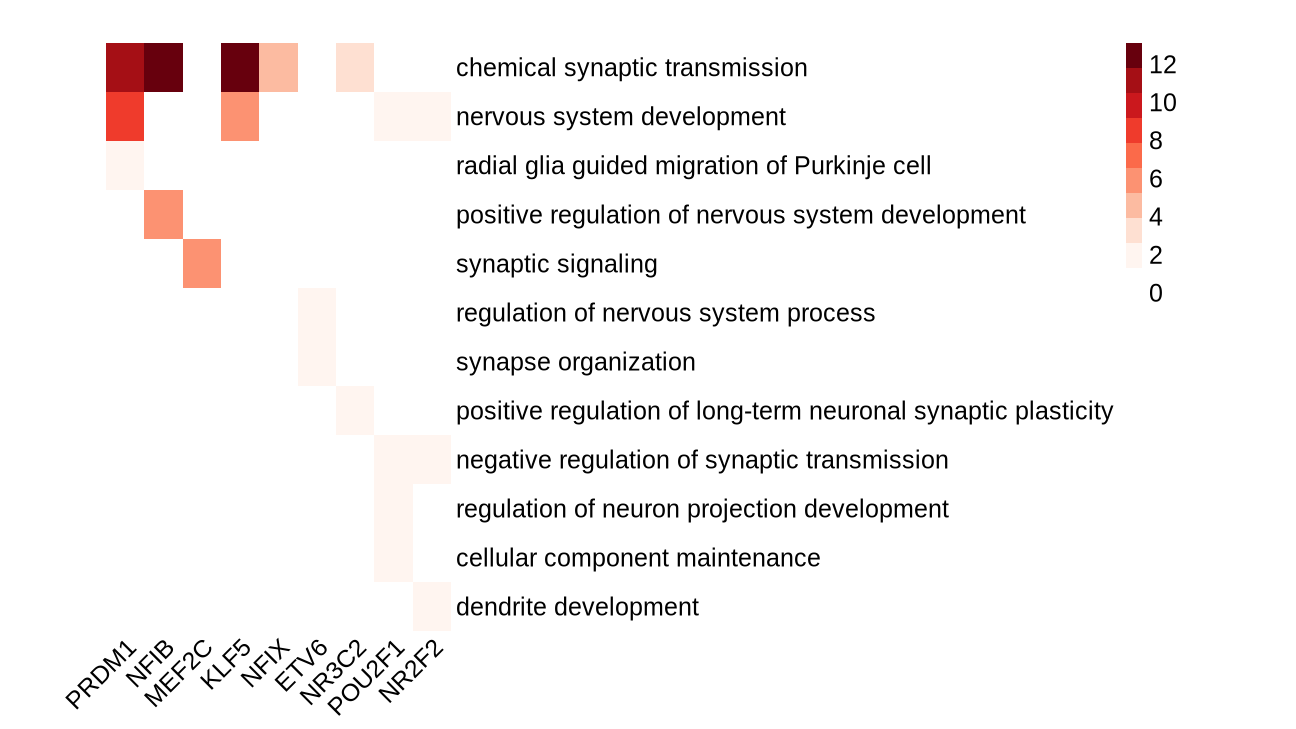

In [15]:

# if we want to explore putting GO term names on the left
# https://stackoverflow.com/questions/57729914/how-can-you-show-the-rownames-in-pheatmap-on-the-left-side-of-the-graph
repr.plot.ratio <- 1.35
options(repr.plot.width = 8 * repr.plot.ratio, repr.plot.height=4.5 * repr.plot.ratio)

g <- pheatmap(int_enr_sum,
              col = c('white', brewer.pal(9, 'Reds')),
              cluster_rows = F, cluster_cols = F,
              annotation_names_row = F,
              annotation_names_col = F,
              fontsize_row = 15,          # row label font size
              fontsize_col = 15,          # column label font size 
              angle_col = 45, # sample names at an angle
              show_colnames = T, show_rownames = T, # displaying column and row names
              main = '',
              fontsize = 15,
              border_color  = NA, cellwidth=23)
ggsave(sprintf('%s/trio/%s_2000.pdf', fig_dir, ct), g, width = 6 * repr.plot.ratio, height = 4 * repr.plot.ratio)

## Oligodendrocytes

In [16]:
Oli_enr <- list()
ct <- 'Oligodendrocytes'
fn <- sprintf('%s/brain_CG/%s_trio_p_2000.rds', output_dir, ct)
if(!file.exists(fn)){
    trios_list <- load_trios_list(2000, ct, study, trio_pval_cutoff_vec[ct], output_dir)
    Oli_enr[['p=2000']] <- summarize_enr(trios_list, p_top = 10)
    saveRDS(Oli_enr[['p=2000']], fn)
}else{
    Oli_enr[['p=2000']] <- readRDS(fn)
}


In [17]:

enrich_matrix <- make_pheatmap(Oli_enr[['p=2000']])
#data.frame(rownames(enrich_matrix), 1:nrow(enrich_matrix))#[30:nrow(enrich_matrix ),]
selected_inds <- c(1,3,8,9,12,14,19,20,21,26,27,31,32,43,52)

sum_enr <- enrich_matrix[selected_inds,]
# filter by adjusted p value < 0.05
int_enr_sum <- sum_enr[apply(sum_enr,1,max) > -log10(0.05),] 
# filter TFs with no relevant enrichment
int_enr_sum <- int_enr_sum[,colSums(int_enr_sum) > 0]

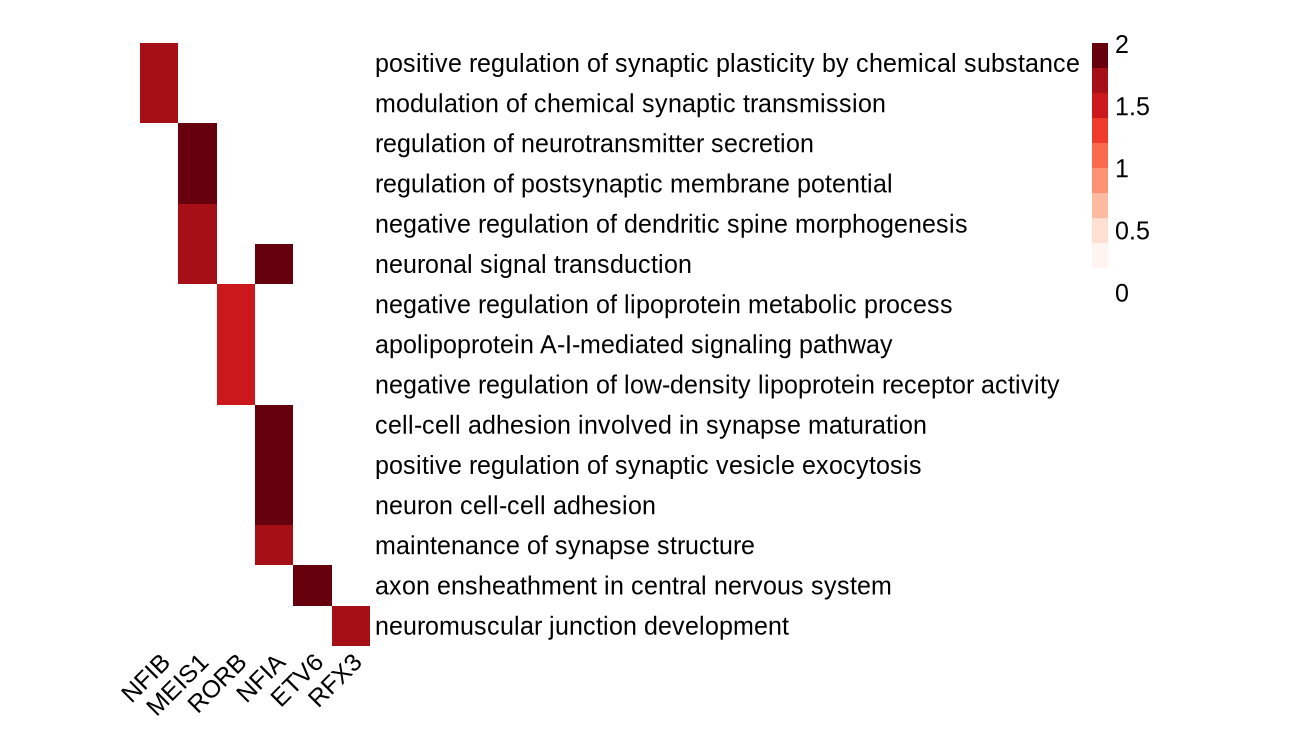

In [18]:
repr.plot.ratio <- 1.35
options(repr.plot.width = 8 * repr.plot.ratio, repr.plot.height=4.5 * repr.plot.ratio)

g <- pheatmap(int_enr_sum,
              col = c('white', brewer.pal(9, 'Reds')),
              cluster_rows = F, cluster_cols = F,
              annotation_names_row = F,
              annotation_names_col = F,
              fontsize_row = 15,          # row label font size
              fontsize_col = 15,          # column label font size 
              angle_col = 45, # sample names at an angle
              show_colnames = T, show_rownames = T, # displaying column and row names
              main = '',
              fontsize = 15,
              border_color  = NA, cellwidth=23)
ggsave(sprintf('%s/trio/%s_2000.pdf', fig_dir, ct), g, width = 6 * repr.plot.ratio, height = 4 * repr.plot.ratio)